# Practica 3: Perceptron monocapa

In [298]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [299]:
# Implementacion del perceptron
class perceptron():
    
    def __init__(self):
        self.w = None
        self.b = None
        self.f = None
        self.o = None
        self.stats = dict()

    def setWeights(self, w):
        self.w = w

    def setBias(self, b):
        self.b = b

    def setAFunction(self, f):
        if f == 'hardlim':
            self.f = lambda x: 0 if x<0 else 1
        elif f == 'hardlims':
            self.f = lambda x: -1 if x<0 else 1
        elif f == 'purelin':
            self.f = lambda x: x
        elif f == 'logsigmoid':
            self.f = lambda x: 1/(1+np.exp(-x))

    def output(self, n):
        self.o = self.f(n)

    def fit(self, X, Y):
        e = 1                 # Error
        eVector = []          # Vector de error
        eCount = 0            # Cuenta de error (incrementa cuando e=0)
        itCount = 0           # Numero de iteraciones
        itLimit = 9999        # Maximo de iteraciones
        k = 0                 # Indice de los vectores X e Y
        # El ciclo while termina cuando:
        # 1. El error es 0 para todos los vectores de entrenamiento en X
        # 2. Se ha llegado al maximo de iteraciones
        while True:
            if eCount == X.shape[0]:           
                break
            if itCount == itLimit:
                print('El perceptron no converge a una solucion...')
                break
            # Paso 1: Obtener la salida del perceptron -> wx+b
            self.output(np.dot(self.w, X[k]) + self.b)
            # Paso 2: Calcular el error
            e = Y[k] - self.o
            eVector.append(e)
            # Paso 3: Actualizar el vector de pesos y el bias
            if e == 0:
                eCount += 1
            else:
                # Si hay un error, reiniciar el contador a 0
                if eCount > 0:
                    eCount = 0
                self.w = self.w + e*X[k]
                self.b = self.b + e
            # Actualizar el indice 
            if k == X.shape[0]-1:
                k = 0
            else:
                k += 1
            itCount += 1
            # Impresion de ajuste de pesos
            print('Iteracion = ', itCount)
            print('Pesos = ', self.w)
            print('Bias = ', self.b)
            print('Error = ', e)
            print('')

        self.stats['steps'] = itCount
        self.stats['error'] = e
        self.stats['eVector'] = eVector

In [300]:
# Datos ejercicio 0
x0 = np.array([-1,2,-3,3])
y0 = np.array([2,3,-4,-2]) 
X0 = np.vstack((x0,y0)).ravel(order='F').reshape(4,2)
t0 = np.array([1,1,0,0])

In [301]:
# Creacion del perceptron
p0 = perceptron()
p0.setWeights(np.array([-1,-1]))
p0.setBias(0)
p0.setAFunction('hardlim')

In [302]:
# Entrenamiento del perceptron
p0.fit(X0, t0)
print('Pesos finales: ', p0.w)
print('Bias final: ', p0.b)

Iteracion =  1
Pesos =  [-2  1]
Bias =  1
Error =  1

Iteracion =  2
Pesos =  [-2  1]
Bias =  1
Error =  0

Iteracion =  3
Pesos =  [1 5]
Bias =  0
Error =  -1

Iteracion =  4
Pesos =  [1 5]
Bias =  0
Error =  0

Iteracion =  5
Pesos =  [1 5]
Bias =  0
Error =  0

Iteracion =  6
Pesos =  [1 5]
Bias =  0
Error =  0

Iteracion =  7
Pesos =  [1 5]
Bias =  0
Error =  0

Pesos finales:  [1 5]
Bias final:  0


In [303]:
# Definicion del vector x 
x = np.linspace(-8,8, 100)

In [304]:
# Definicion de la recta que dividide los datos del ejercicio 0
z0 = -1/5*x

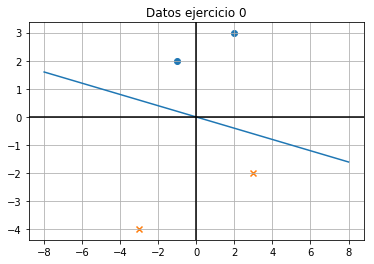

In [305]:
fig = plt.figure()
plt.scatter(x0[:2],y0[:2], marker='o')
plt.scatter(x0[2:],y0[2:], marker='x')
plt.plot(x, z0)
plt.title('Datos ejercicio 0')
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)
plt.show()

In [306]:
# Datos ejercicio 1
x1 = np.array([2,0,7,4,1,-3,-2,-5,-6,-6,5,1,3,1,2,-4,-3,-6,6])
y1 = np.array([1,3,2,5,8,4,-1.5,1,-1,5,-2,-3,-5,-6,-7,-5,-7,-8,-8])
X1 = np.vstack((x1,y1)).ravel(order='F').reshape(19,2)
t1 = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])

In [307]:
p1 = perceptron()
p1.setBias(np.random.randint(-5,5))
p1.setWeights(np.array(np.random.randint(-5,5,size=(1,2))))
p1.setAFunction('hardlim')

In [308]:
print('Pesos iniciales : ', p1.w)
print('Bias inicial : ', p1.b)

Pesos iniciales :  [[-2 -1]]
Bias inicial :  -1


In [309]:
# Entrenamiento del perceptron
p1.fit(X1,t1)
print('Pesos finales: ', p1.w)
print('Bias final: ', p1.b)

Iteracion =  1
Pesos =  [[0. 0.]]
Bias =  0
Error =  1

Iteracion =  2
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  3
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  4
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  5
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  6
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  7
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  8
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  9
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  10
Pesos =  [[0. 0.]]
Bias =  0
Error =  0

Iteracion =  11
Pesos =  [[-5.  2.]]
Bias =  -1
Error =  -1

Iteracion =  12
Pesos =  [[-5.  2.]]
Bias =  -1
Error =  0

Iteracion =  13
Pesos =  [[-5.  2.]]
Bias =  -1
Error =  0

Iteracion =  14
Pesos =  [[-5.  2.]]
Bias =  -1
Error =  0

Iteracion =  15
Pesos =  [[-5.  2.]]
Bias =  -1
Error =  0

Iteracion =  16
Pesos =  [[-1.  7.]]
Bias =  -2
Error =  -1

Iteracion =  17
Pesos =  [[-1.  7.]]
Bias =  -2
Error =  0

Iteracion =  18
P

In [310]:
# Definicion de la recta que separa los datos del ejercicio 1
z1 = -p1.b/p1.w[0,1] - p1.w[0,0]/p1.w[0,1]*x

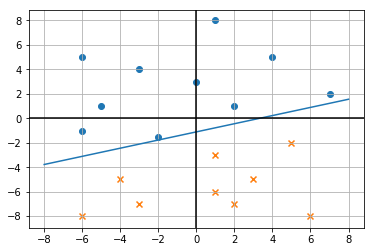

In [311]:
fig2 = plt.figure()
plt.scatter(x1[:10], y1[:10], marker='o')
plt.scatter(x1[10:], y1[10:], marker='x')
plt.plot(x, z1)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)
plt.show()

In [312]:
# Datos ejercicio 2
x2 = np.array([4,2,2,0,-2,-3,-4,-6,2,0,3,4,-2,4,7,-6,-4,-5])
y2 = np.array([5,4,8,2,9,3,7,9,1,0,-2,3,-4,-5,-7,-5,-8,2])
X2 = np.vstack((x2,y2)).ravel(order='F').reshape(18,2)
t2 = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])

In [313]:
p2 = perceptron()
p2.setBias(np.random.randint(-5,5))
p2.setWeights(np.array(np.random.randint(-5,5,size=(1,2))))
p2.setAFunction('hardlim')

In [314]:
p2.fit(X2, t2)

Iteracion =  1
Pesos =  [[1 4]]
Bias =  5
Error =  1

Iteracion =  2
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  3
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  4
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  5
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  6
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  7
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  8
Pesos =  [[1 4]]
Bias =  5
Error =  0

Iteracion =  9
Pesos =  [[-1  3]]
Bias =  4
Error =  -1

Iteracion =  10
Pesos =  [[-1  3]]
Bias =  3
Error =  -1

Iteracion =  11
Pesos =  [[-1  3]]
Bias =  3
Error =  0

Iteracion =  12
Pesos =  [[-5  0]]
Bias =  2
Error =  -1

Iteracion =  13
Pesos =  [[-3  4]]
Bias =  1
Error =  -1

Iteracion =  14
Pesos =  [[-3  4]]
Bias =  1
Error =  0

Iteracion =  15
Pesos =  [[-3  4]]
Bias =  1
Error =  0

Iteracion =  16
Pesos =  [[-3  4]]
Bias =  1
Error =  0

Iteracion =  17
Pesos =  [[-3  4]]
Bias =  1
Error =  0

Iteracion =  18
Pesos =  [[2 2]]
Bias =  0
Error =  

Bias =  -14
Error =  0

Iteracion =  162
Pesos =  [[3 2]]
Bias =  -15
Error =  -1

Iteracion =  163
Pesos =  [[3 2]]
Bias =  -15
Error =  0

Iteracion =  164
Pesos =  [[5 6]]
Bias =  -14
Error =  1

Iteracion =  165
Pesos =  [[5 6]]
Bias =  -14
Error =  0

Iteracion =  166
Pesos =  [[5 8]]
Bias =  -13
Error =  1

Iteracion =  167
Pesos =  [[5 8]]
Bias =  -13
Error =  0

Iteracion =  168
Pesos =  [[ 2 11]]
Bias =  -12
Error =  1

Iteracion =  169
Pesos =  [[ 2 11]]
Bias =  -12
Error =  0

Iteracion =  170
Pesos =  [[ 2 11]]
Bias =  -12
Error =  0

Iteracion =  171
Pesos =  [[ 0 10]]
Bias =  -13
Error =  -1

Iteracion =  172
Pesos =  [[ 0 10]]
Bias =  -13
Error =  0

Iteracion =  173
Pesos =  [[ 0 10]]
Bias =  -13
Error =  0

Iteracion =  174
Pesos =  [[-4  7]]
Bias =  -14
Error =  -1

Iteracion =  175
Pesos =  [[-4  7]]
Bias =  -14
Error =  0

Iteracion =  176
Pesos =  [[-4  7]]
Bias =  -14
Error =  0

Iteracion =  177
Pesos =  [[-4  7]]
Bias =  -14
Error =  0

Iteracion =  178
Pesos = 

Iteracion =  439
Pesos =  [[ 1 10]]
Bias =  -18
Error =  0

Iteracion =  440
Pesos =  [[ 1 10]]
Bias =  -18
Error =  0

Iteracion =  441
Pesos =  [[ 1 10]]
Bias =  -18
Error =  0

Iteracion =  442
Pesos =  [[ 1 10]]
Bias =  -18
Error =  0

Iteracion =  443
Pesos =  [[ 1 10]]
Bias =  -18
Error =  0

Iteracion =  444
Pesos =  [[-3  7]]
Bias =  -19
Error =  -1

Iteracion =  445
Pesos =  [[-3  7]]
Bias =  -19
Error =  0

Iteracion =  446
Pesos =  [[-3  7]]
Bias =  -19
Error =  0

Iteracion =  447
Pesos =  [[-3  7]]
Bias =  -19
Error =  0

Iteracion =  448
Pesos =  [[-3  7]]
Bias =  -19
Error =  0

Iteracion =  449
Pesos =  [[-3  7]]
Bias =  -19
Error =  0

Iteracion =  450
Pesos =  [[2 5]]
Bias =  -20
Error =  -1

Iteracion =  451
Pesos =  [[2 5]]
Bias =  -20
Error =  0

Iteracion =  452
Pesos =  [[2 5]]
Bias =  -20
Error =  0

Iteracion =  453
Pesos =  [[2 5]]
Bias =  -20
Error =  0

Iteracion =  454
Pesos =  [[2 7]]
Bias =  -19
Error =  1

Iteracion =  455
Pesos =  [[2 7]]
Bias =  -19
Er

Error =  0

Iteracion =  606
Pesos =  [[-6  7]]
Bias =  -20
Error =  -1

Iteracion =  607
Pesos =  [[-6  7]]
Bias =  -20
Error =  0

Iteracion =  608
Pesos =  [[-6  7]]
Bias =  -20
Error =  0

Iteracion =  609
Pesos =  [[-6  7]]
Bias =  -20
Error =  0

Iteracion =  610
Pesos =  [[-6  7]]
Bias =  -20
Error =  0

Iteracion =  611
Pesos =  [[-6  7]]
Bias =  -20
Error =  0

Iteracion =  612
Pesos =  [[-1  5]]
Bias =  -21
Error =  -1

Iteracion =  613
Pesos =  [[-1  5]]
Bias =  -21
Error =  0

Iteracion =  614
Pesos =  [[1 9]]
Bias =  -20
Error =  1

Iteracion =  615
Pesos =  [[1 9]]
Bias =  -20
Error =  0

Iteracion =  616
Pesos =  [[ 1 11]]
Bias =  -19
Error =  1

Iteracion =  617
Pesos =  [[ 1 11]]
Bias =  -19
Error =  0

Iteracion =  618
Pesos =  [[ 1 11]]
Bias =  -19
Error =  0

Iteracion =  619
Pesos =  [[ 1 11]]
Bias =  -19
Error =  0

Iteracion =  620
Pesos =  [[ 1 11]]
Bias =  -19
Error =  0

Iteracion =  621
Pesos =  [[ 1 11]]
Bias =  -19
Error =  0

Iteracion =  622
Pesos =  [[ 1

Pesos =  [[-6  7]]
Bias =  -21
Error =  0

Iteracion =  773
Pesos =  [[-6  7]]
Bias =  -21
Error =  0

Iteracion =  774
Pesos =  [[-1  5]]
Bias =  -22
Error =  -1

Iteracion =  775
Pesos =  [[ 3 10]]
Bias =  -21
Error =  1

Iteracion =  776
Pesos =  [[ 3 10]]
Bias =  -21
Error =  0

Iteracion =  777
Pesos =  [[ 3 10]]
Bias =  -21
Error =  0

Iteracion =  778
Pesos =  [[ 3 12]]
Bias =  -20
Error =  1

Iteracion =  779
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  780
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  781
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  782
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  783
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  784
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  785
Pesos =  [[ 3 12]]
Bias =  -20
Error =  0

Iteracion =  786
Pesos =  [[-1  9]]
Bias =  -21
Error =  -1

Iteracion =  787
Pesos =  [[-1  9]]
Bias =  -21
Error =  0

Iteracion =  788
Pesos =  [[-1  9]]
Bias =  -21
Error =

Iteracion =  939
Pesos =  [[-1  8]]
Bias =  -22
Error =  0

Iteracion =  940
Pesos =  [[-1 10]]
Bias =  -21
Error =  1

Iteracion =  941
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  942
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  943
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  944
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  945
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  946
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  947
Pesos =  [[-1 10]]
Bias =  -21
Error =  0

Iteracion =  948
Pesos =  [[-5  7]]
Bias =  -22
Error =  -1

Iteracion =  949
Pesos =  [[-5  7]]
Bias =  -22
Error =  0

Iteracion =  950
Pesos =  [[-5  7]]
Bias =  -22
Error =  0

Iteracion =  951
Pesos =  [[-5  7]]
Bias =  -22
Error =  0

Iteracion =  952
Pesos =  [[-5  7]]
Bias =  -22
Error =  0

Iteracion =  953
Pesos =  [[-5  7]]
Bias =  -22
Error =  0

Iteracion =  954
Pesos =  [[0 5]]
Bias =  -23
Error =  -1

Iteracion =  955
Pesos =  [[0 5]]
Bias =

Bias =  -22
Error =  0

Iteracion =  1106
Pesos =  [[-1 10]]
Bias =  -22
Error =  0

Iteracion =  1107
Pesos =  [[-1 10]]
Bias =  -22
Error =  0

Iteracion =  1108
Pesos =  [[-1 10]]
Bias =  -22
Error =  0

Iteracion =  1109
Pesos =  [[-1 10]]
Bias =  -22
Error =  0

Iteracion =  1110
Pesos =  [[-5  7]]
Bias =  -23
Error =  -1

Iteracion =  1111
Pesos =  [[-5  7]]
Bias =  -23
Error =  0

Iteracion =  1112
Pesos =  [[-5  7]]
Bias =  -23
Error =  0

Iteracion =  1113
Pesos =  [[-5  7]]
Bias =  -23
Error =  0

Iteracion =  1114
Pesos =  [[-5  7]]
Bias =  -23
Error =  0

Iteracion =  1115
Pesos =  [[-5  7]]
Bias =  -23
Error =  0

Iteracion =  1116
Pesos =  [[0 5]]
Bias =  -24
Error =  -1

Iteracion =  1117
Pesos =  [[0 5]]
Bias =  -24
Error =  0

Iteracion =  1118
Pesos =  [[2 9]]
Bias =  -23
Error =  1

Iteracion =  1119
Pesos =  [[2 9]]
Bias =  -23
Error =  0

Iteracion =  1120
Pesos =  [[ 2 11]]
Bias =  -22
Error =  1

Iteracion =  1121
Pesos =  [[ 2 11]]
Bias =  -22
Error =  0

Iterac

Error =  0

Iteracion =  1328
Pesos =  [[-6  8]]
Bias =  -24
Error =  0

Iteracion =  1329
Pesos =  [[-6  8]]
Bias =  -24
Error =  0

Iteracion =  1330
Pesos =  [[-6  8]]
Bias =  -24
Error =  0

Iteracion =  1331
Pesos =  [[-6  8]]
Bias =  -24
Error =  0

Iteracion =  1332
Pesos =  [[-1  6]]
Bias =  -25
Error =  -1

Iteracion =  1333
Pesos =  [[-1  6]]
Bias =  -25
Error =  0

Iteracion =  1334
Pesos =  [[ 1 10]]
Bias =  -24
Error =  1

Iteracion =  1335
Pesos =  [[ 1 10]]
Bias =  -24
Error =  0

Iteracion =  1336
Pesos =  [[ 1 12]]
Bias =  -23
Error =  1

Iteracion =  1337
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =  1338
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =  1339
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =  1340
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =  1341
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =  1342
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =  1343
Pesos =  [[ 1 12]]
Bias =  -23
Error =  0

Iteracion =


Iteracion =  1550
Pesos =  [[5 9]]
Bias =  -26
Error =  0

Iteracion =  1551
Pesos =  [[5 9]]
Bias =  -26
Error =  0

Iteracion =  1552
Pesos =  [[ 5 11]]
Bias =  -25
Error =  1

Iteracion =  1553
Pesos =  [[ 5 11]]
Bias =  -25
Error =  0

Iteracion =  1554
Pesos =  [[ 2 14]]
Bias =  -24
Error =  1

Iteracion =  1555
Pesos =  [[ 2 14]]
Bias =  -24
Error =  0

Iteracion =  1556
Pesos =  [[ 2 14]]
Bias =  -24
Error =  0

Iteracion =  1557
Pesos =  [[ 2 14]]
Bias =  -24
Error =  0

Iteracion =  1558
Pesos =  [[ 2 14]]
Bias =  -24
Error =  0

Iteracion =  1559
Pesos =  [[ 2 14]]
Bias =  -24
Error =  0

Iteracion =  1560
Pesos =  [[-2 11]]
Bias =  -25
Error =  -1

Iteracion =  1561
Pesos =  [[-2 11]]
Bias =  -25
Error =  0

Iteracion =  1562
Pesos =  [[-2 11]]
Bias =  -25
Error =  0

Iteracion =  1563
Pesos =  [[-2 11]]
Bias =  -25
Error =  0

Iteracion =  1564
Pesos =  [[-2 11]]
Bias =  -25
Error =  0

Iteracion =  1565
Pesos =  [[-2 11]]
Bias =  -25
Error =  0

Iteracion =  1566
Pesos = 

Iteracion =  1744
Pesos =  [[-4 11]]
Bias =  -26
Error =  0

Iteracion =  1745
Pesos =  [[-4 11]]
Bias =  -26
Error =  0

Iteracion =  1746
Pesos =  [[1 9]]
Bias =  -27
Error =  -1

Iteracion =  1747
Pesos =  [[1 9]]
Bias =  -27
Error =  0

Iteracion =  1748
Pesos =  [[1 9]]
Bias =  -27
Error =  0

Iteracion =  1749
Pesos =  [[1 9]]
Bias =  -27
Error =  0

Iteracion =  1750
Pesos =  [[ 1 11]]
Bias =  -26
Error =  1

Iteracion =  1751
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1752
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1753
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1754
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1755
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1756
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1757
Pesos =  [[ 1 11]]
Bias =  -26
Error =  0

Iteracion =  1758
Pesos =  [[-3  8]]
Bias =  -27
Error =  -1

Iteracion =  1759
Pesos =  [[-3  8]]
Bias =  -27
Error =  0

Iteracion =  1760
Pesos =  [[-

Error =  -1

Iteracion =  1939
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1940
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1941
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1942
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1943
Pesos =  [[-3 12]]
Bias =  -27
Error =  0

Iteracion =  1944
Pesos =  [[ 2 10]]
Bias =  -28
Error =  -1

Iteracion =  1945
Pesos =  [[ 2 10]]
Bias =  -28
Error =  0

Iteracion =  1946
Pesos =  [[ 2 10]]
Bias =  -28
Error =  0

Iteracion =  1947
Pesos =  [[ 2 10]]
Bias =  -28
Error =  0

Iteracion =  1948
Pesos =  [[ 2 12]]
Bias =  -27
Error =  1

Iteracion =  1949
Pesos =  [[ 2 12]]
Bias =  -27
Error =  0

Iteracion =  1950
Pesos =  [[ 2 12]]
Bias =  -27
Error =  0

Iteracion =  1951
Pesos =  [[ 2 12]]
Bias =  -27
Error =  0

Iteracion =  1952
Pesos =  [[ 2 12]]
Bias =  -27
Error =  0

Iteracion =  1953
Pesos =  [[ 2 12]]
Bias =  -27
Error =  0

Iteracion =  1954
Pesos =  [[ 2 12]]
Bias =  -27
Error =  0

Iteracion 


Iteracion =  2161
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2162
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2163
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2164
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  2165
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  2166
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  2167
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2168
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2169
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2170
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2171
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2172
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  2173
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2174
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2175
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2176
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2177
Pesos =  [

Iteracion =  2383
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2384
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2385
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2386
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2387
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  2388
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  2389
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2390
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2391
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2392
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2393
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  2394
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  2395
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  2396
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  2397
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  2398
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  2399
Pesos = 

Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2606
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2607
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2608
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2609
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  2610
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  2611
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2612
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2613
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2614
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  2615
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  2616
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  2617
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2618
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2619
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2620
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2621
Pesos =  [[-2 13]]
Bias =  -28



Iteracion =  2883
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  2884
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  2885
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  2886
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  2887
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2888
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2889
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2890
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2891
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  2892
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  2893
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2894
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2895
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2896
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2897
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  2898
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  2899
Pesos

Iteracion =  3105
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  3106
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  3107
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  3108
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  3109
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3110
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3111
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3112
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3113
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3114
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  3115
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  3116
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  3117
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  3118
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  3119
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  3120
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  3121
Pesos = 

Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  3328
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  3329
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  3330
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  3331
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  3332
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  3333
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  3334
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  3335
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  3336
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  3337
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3338
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3339
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3340
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3341
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3342
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  3343
Pesos =  [[-6 10]]
Bias =  -29

Iteracion =  3605
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  3606
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  3607
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3608
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3609
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3610
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3611
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  3612
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  3613
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3614
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3615
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3616
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3617
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  3618
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  3619
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3620
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  3621
Peso

Iteracion =  3827
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  3828
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  3829
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3830
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3831
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3832
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3833
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  3834
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  3835
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  3836
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  3837
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  3838
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  3839
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  3840
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  3841
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  3842
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  3843
Pesos = 

Iteracion =  4080
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4081
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4082
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4083
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4084
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4085
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4086
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4087
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4088
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4089
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  4090
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  4091
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  4092
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  4093
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  4094
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  4095
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  4096
Pesos 

Iteracion =  4327
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  4328
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  4329
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  4330
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  4331
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  4332
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  4333
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4334
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4335
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4336
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4337
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  4338
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  4339
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  4340
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  4341
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  4342
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  4343
Peso

Error =  0

Iteracion =  4554
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  4555
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  4556
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  4557
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  4558
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  4559
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4560
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4561
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4562
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4563
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4564
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4565
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4566
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  4567
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4568
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4569
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4


Iteracion =  4827
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  4828
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  4829
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4830
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4831
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4832
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4833
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4834
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4835
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  4836
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  4837
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4838
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4839
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4840
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4841
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  4842
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  4843
Pesos

Error =  0

Iteracion =  5105
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  5106
Pesos =  [[-2 10]]
Bias =  -29
Error =  -1

Iteracion =  5107
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  5108
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  5109
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  5110
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  5111
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  5112
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  5113
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  5114
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  5115
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  5116
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  5117
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  5118
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  5119
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5120
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5121


Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  5383
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  5384
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  5385
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  5386
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  5387
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  5388
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  5389
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5390
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5391
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5392
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5393
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5394
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  5395
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5396
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5397
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5398
Pesos =  [[-4 10]]
Bias =  -29

Iteracion =  5660
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5661
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5662
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5663
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  5664
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  5665
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5666
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5667
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5668
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5669
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5670
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  5671
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5672
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5673
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5674
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  5675
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  5676
Pesos =  [[-

Error =  0

Iteracion =  5938
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5939
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  5940
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  5941
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5942
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5943
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  5944
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  5945
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  5946
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  5947
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  5948
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  5949
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  5950
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  5951
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  5952
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  5953
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  5954


Bias =  -29
Error =  0

Iteracion =  6216
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  6217
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6218
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6219
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6220
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6221
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  6222
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  6223
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6224
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6225
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6226
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6227
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6228
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  6229
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6230
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6231
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6494
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6495
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6496
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6497
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  6498
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  6499
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6500
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6501
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6502
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  6503
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6504
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6505
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6506
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6507
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6508
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6509
Pesos =  [[-1 10]]
Bias

Iteracion =  6771
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  6772
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  6773
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6774
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6775
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6776
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6777
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6778
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6779
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6780
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6781
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6782
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6783
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6784
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6785
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6786
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  6787
Pesos 

Error =  0

Iteracion =  7049
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7050
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7051
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7052
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7053
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7054
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7055
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7056
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7057
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7058
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7059
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7060
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  7061
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7062
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7063
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7064
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion = 


Iteracion =  7271
Pesos =  [[-2 10]]
Bias =  -29
Error =  0

Iteracion =  7272
Pesos =  [[3 8]]
Bias =  -30
Error =  -1

Iteracion =  7273
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7274
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7275
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7276
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  7277
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  7278
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  7279
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7280
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7281
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7282
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7283
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  7284
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  7285
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  7286
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  7287
Pesos =  [[

Iteracion =  7493
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7494
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7495
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7496
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7497
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7498
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7499
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7500
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7501
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7502
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7503
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7504
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7505
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7506
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7507
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7508
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7509
Pesos 

Error =  0

Iteracion =  7771
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7772
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7773
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7774
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7775
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7776
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7777
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7778
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7779
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  7780
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  7781
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7782
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7783
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7784
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7785
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  7786
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion = 


Iteracion =  7993
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7994
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7995
Pesos =  [[3 8]]
Bias =  -30
Error =  0

Iteracion =  7996
Pesos =  [[ 3 10]]
Bias =  -29
Error =  1

Iteracion =  7997
Pesos =  [[ 3 10]]
Bias =  -29
Error =  0

Iteracion =  7998
Pesos =  [[ 0 13]]
Bias =  -28
Error =  1

Iteracion =  7999
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  8000
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  8001
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  8002
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  8003
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  8004
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  8005
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8006
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8007
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8008
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8009
Pesos =  [

Iteracion =  8215
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8216
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8217
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8218
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8219
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8220
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8221
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8222
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8223
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8224
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8225
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8226
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8227
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8228
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8229
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8230
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  8231
Pesos 

Error =  0

Iteracion =  8493
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8494
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8495
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8496
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8497
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8498
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8499
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  8500
Pesos =  [[-1 12]]
Bias =  -28
Error =  1

Iteracion =  8501
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8502
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8503
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8504
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8505
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8506
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8507
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8508
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =

Bias =  -28
Error =  1

Iteracion =  8771
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8772
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8773
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8774
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8775
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8776
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8777
Pesos =  [[-1 12]]
Bias =  -28
Error =  0

Iteracion =  8778
Pesos =  [[-5  9]]
Bias =  -29
Error =  -1

Iteracion =  8779
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8780
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8781
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8782
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8783
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  8784
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  8785
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  8786
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

It

Error =  0

Iteracion =  8993
Pesos =  [[ 0 13]]
Bias =  -28
Error =  0

Iteracion =  8994
Pesos =  [[-4 10]]
Bias =  -29
Error =  -1

Iteracion =  8995
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8996
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8997
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8998
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  8999
Pesos =  [[-4 10]]
Bias =  -29
Error =  0

Iteracion =  9000
Pesos =  [[1 8]]
Bias =  -30
Error =  -1

Iteracion =  9001
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9002
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9003
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9004
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  9005
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  9006
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  9007
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9008
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9009


Bias =  -30
Error =  -1

Iteracion =  9271
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9272
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9273
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9274
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  9275
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  9276
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  9277
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9278
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9279
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9280
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9281
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9282
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  9283
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9284
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9285
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9286
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iter

Iteracion =  9548
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9549
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9550
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9551
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9552
Pesos =  [[-6 10]]
Bias =  -29
Error =  -1

Iteracion =  9553
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9554
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9555
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9556
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9557
Pesos =  [[-6 10]]
Bias =  -29
Error =  0

Iteracion =  9558
Pesos =  [[-1  8]]
Bias =  -30
Error =  -1

Iteracion =  9559
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  9560
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  9561
Pesos =  [[-1  8]]
Bias =  -30
Error =  0

Iteracion =  9562
Pesos =  [[-1 10]]
Bias =  -29
Error =  1

Iteracion =  9563
Pesos =  [[-1 10]]
Bias =  -29
Error =  0

Iteracion =  9564
Peso

Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9771
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9772
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9773
Pesos =  [[-5  9]]
Bias =  -29
Error =  0

Iteracion =  9774
Pesos =  [[0 7]]
Bias =  -30
Error =  -1

Iteracion =  9775
Pesos =  [[0 7]]
Bias =  -30
Error =  0

Iteracion =  9776
Pesos =  [[ 2 11]]
Bias =  -29
Error =  1

Iteracion =  9777
Pesos =  [[ 2 11]]
Bias =  -29
Error =  0

Iteracion =  9778
Pesos =  [[ 2 13]]
Bias =  -28
Error =  1

Iteracion =  9779
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9780
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9781
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9782
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9783
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9784
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9785
Pesos =  [[ 2 13]]
Bias =  -28
Error =  0

Iteracion =  9786
Pesos =  [[-2 10]]
Bias =  

Bias =  -30
Error =  0

Iteracion =  9993
Pesos =  [[1 8]]
Bias =  -30
Error =  0

Iteracion =  9994
Pesos =  [[ 1 10]]
Bias =  -29
Error =  1

Iteracion =  9995
Pesos =  [[ 1 10]]
Bias =  -29
Error =  0

Iteracion =  9996
Pesos =  [[-2 13]]
Bias =  -28
Error =  1

Iteracion =  9997
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9998
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

Iteracion =  9999
Pesos =  [[-2 13]]
Bias =  -28
Error =  0

El perceptron no converge a una solucion...


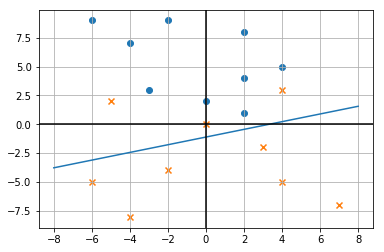

In [321]:
fig3 = plt.figure()
plt.scatter(x2[:9], y2[:9],marker='o')
plt.scatter(x2[9:], y2[9:],marker='x')
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid(True)
plt.show()

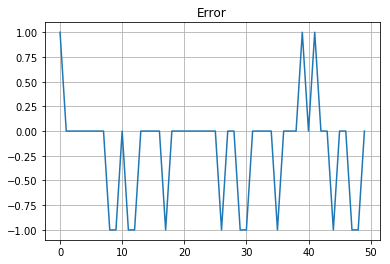

In [317]:
# Grafica de la funcion de error para el ejercicio 2
fig4 = plt.figure()
plt.plot(p2.stats['eVector'][0:50])
plt.title('Error')
plt.grid(True)
plt.show()